# <center>**Movie Rating Analysis and Viewers Recommendation Model**</center>


<br>

**Author:** Cesar Hanna

**Date:** March 15, 2021

## **Table of Content**

1. [Introduction](#Introduction)
2. [The Challenge](#The-Challenge)
3. [Description of the Solution](#Description-of-the-Solution)
4. [Description of Data](#Description-of-Data)
5. [Data References](#Data-References)
6. [Decision Criterion](#Decision-Criterion)
7. [Data Frame](#Data-Frame)
8. [Methodology](#Methodology)
9. [Results of Clustering](#Results-of-Clustering)
10. [Observations and Analysis](#Observations-and-Analysis)
11. [Conclusions](#Conclusions)

## **Introduction**

Since decades TV was and still the number 1 entertainment for a lot of people with different ages, genders, occupations and interests.

With that, TV entertainment companies are always on the search of enhancing the viewers experience by providing suggestions and recommendations on what to watch based on the viewer's behaviour. This has proven the efficiency on improving the number of viewers and the subscribers level of satisfaction.

## **The Challenge**

Keeping the customer happy and willing to invest more in the product at hand is no easy task and requires a lot of dedication and support, which in turn require time and money to invest in resources that could be challenging to acquire for many reasons.

Imagine that you hire talents to monitor viewers behaviour and follow up with each and every one of them for new suggestions and recommendations, that would be almost impossible to achieve!

## **Description of the Solution**

The reason of this analysis is to avoid the human interaction as much as possible and help the recommendation mechanism to provide the right suggestions by visualizing different aspects of the users behaviour and clustering those users into groups with the same interests, based on different independent variables that will be described in details in the next sections.

This analysis will include different data frames and visualization methods in order to achieve the required target, and that is the viewers recommendation for each of the different groups that will be extracted from the data set.

## **Description of Data**

The data extracted will contain the following variables. Of course not all of them will be used for analysis, however, the ones that will be used are described in the Decision Criterion section.

- User_ID
- Gender
- Age_Range
- Occupation
- Zip_Code
- Timestamp
- Movie_ID
- Title
- Genres
- Rating

Value description of some of the above variables:
- Ratings are made on a 5-star scale (whole-star ratings only)
- Timestamp is represented in seconds since the epoch
- Gender is denoted by a "M" for male and "F" for female
- Age is chosen from the following ranges:
 - 1:  "Under 18"
 - 18:  "18-24"
 - 25:  "25-34"
 - 35:  "35-44"
 - 45:  "45-49"
 - 50:  "50-55"
 - 56:  "56+"
- Occupation is chosen from the following choices:
 - 0:  "other" or not specified
 - 1:  "academic/educator"
 - 2:  "artist"
 - 3:  "clerical/admin"
 - 4:  "college/grad student"
 - 5:  "customer service"
 - 6:  "doctor/health care"
 - 7:  "executive/managerial"
 - 8:  "farmer"
 - 9:  "homemaker"
 - 10:  "K-12 student"
 - 11:  "lawyer"
 - 12:  "programmer"
 - 13:  "retired"
 - 14:  "sales/marketing"
 - 15:  "scientist"
 - 16:  "self-employed"
 - 17:  "technician/engineer"
 - 18:  "tradesman/craftsman"
 - 19:  "unemployed"
 - 20:  "writer"

## **Data References**

- https://www.lafabbricadellarealta.com/open-data-entertainment/
- https://grouplens.org/datasets/movielens/

## **Decision Criterion**

The end result of the analysis will be to cluster the different viewers groups based on certain features.

Each cluster should include similar viewers personal information such as gender, age range and occupation, and interests such as movie ratings.

The decision then for the recommendation system will be based on comparing the viewers information and clustering according to the given features.

The most important variables that will be used are:
- Gender
- Age_Range
- Occupation
- Genres
- Rating

## **Data Frames**

- **Step 1**: Importing and installing all the necessary libraries and packages
- **Step 2**: Reading all the data sets extracted from the aforementioned data references into data frames
- **Step 3**: Data wrangling - editing and cleaning-up
- **Step 4**: Merging the data frames

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Step 1: Importing and installing all the necessary libraries and packages**

In [ ]:
#Library for data analsysis
import pandas as pd

#Library to handle data in a vectorized manner
import numpy as np

#Matplotlib library used for plotting different types of plots
import matplotlib.pyplot as plt
%matplotlib inline

#Seaborn used to plot a type of histogram and scatter plot
import seaborn as sns

print('Libraries are imported!')

Libraries are imported!


<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Step 2: Reading all the data sets extracted from the aforementioned data references into data frames**

In [ ]:
df_users = pd.read_csv('/users.csv')
df_users

,User_ID,Gender,Age_Range,Occupation,Zip_Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,2460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,1060


In [ ]:
df_movies = pd.read_csv('/movies.csv', encoding='latin-1')
df_movies

,Movie_ID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [ ]:
df_ratings = pd.read_csv('/ratings.csv')
df_ratings

,User_ID,Movie_ID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Step 3: Data wrangling - editing and cleaning-up**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Dropping the "Timestamp" and "Zip_Code" variables as they are not relevant in the analysis

In [ ]:
#df_users dataframe
df_users_updated = df_users.drop(['Zip_Code'], axis=1)
df_users_updated.head()

,User_ID,Gender,Age_Range,Occupation
0,1,F,1,10
1,2,M,56,16
2,3,M,25,15
3,4,M,45,7
4,5,M,25,20


In [ ]:
#df_ratings dataframe
df_ratings_updated = df_ratings.drop(['Timestamp'], axis=1)
df_ratings_updated.head()

,User_ID,Movie_ID,Rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Step 4: Merging the data frames**

In [ ]:
#Merging first df_users_updated and df_movies:
df_users_info = df_ratings_updated[['User_ID']].merge(df_users_updated[['User_ID', 'Gender', 'Age_Range', 'Occupation']], on=['User_ID'], how='left')
df_users_info

,User_ID,Gender,Age_Range,Occupation
0,1,F,1,10
1,1,F,1,10
2,1,F,1,10
3,1,F,1,10
4,1,F,1,10
...,...,...,...,...
1000204,6040,M,25,6
1000205,6040,M,25,6
1000206,6040,M,25,6
1000207,6040,M,25,6


In [ ]:
df_movie_info = df_ratings_updated[['User_ID', 'Movie_ID', 'Rating']].merge(df_movies[['Movie_ID', 'Title', 'Genres']], on=['Movie_ID'], how='left')
df_movie_info

,User_ID,Movie_ID,Rating,Title,Genres
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,My Fair Lady (1964),Musical|Romance
3,1,3408,4,Erin Brockovich (2000),Drama
4,1,2355,5,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...
1000204,6040,1091,1,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,Sophie's Choice (1982),Drama


In [ ]:
#Merging df_users_info and df_movie_info and converting the dataframe into a dictionary to get rid of the duplicated column(s)
df_merged = pd.concat([df_movie_info, df_users_info], axis=1)
df_merged_dict = df_merged.to_dict()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Converting the dictionary back to a dataframe free of duplicated columns
df_merged_updated = pd.DataFrame(df_merged_dict)
df_merged_updated

,User_ID,Movie_ID,Rating,Title,Genres,Gender,Age_Range,Occupation
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10
1,1,661,3,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10
2,1,914,3,My Fair Lady (1964),Musical|Romance,F,1,10
3,1,3408,4,Erin Brockovich (2000),Drama,F,1,10
4,1,2355,5,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10
...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,Weekend at Bernie's (1989),Comedy,M,25,6
1000205,6040,1094,5,"Crying Game, The (1992)",Drama|Romance|War,M,25,6
1000206,6040,562,5,Welcome to the Dollhouse (1995),Comedy|Drama,M,25,6
1000207,6040,1096,4,Sophie's Choice (1982),Drama,M,25,6


In [ ]:
df_merged_updated_grouped = df_merged_updated.groupby(['User_ID', 'Gender', 'Age_Range', 'Occupation', 'Genres']).mean().reset_index()
df_merged_updated_grouped

,User_ID,Gender,Age_Range,Occupation,Genres,Movie_ID,Rating
0,1,F,1,10,Action|Adventure|Comedy|Romance,1197.000000,3.000000
1,1,F,1,10,Action|Adventure|Drama,1287.000000,5.000000
2,1,F,1,10,Action|Adventure|Fantasy|Sci-Fi,260.000000,4.000000
3,1,F,1,10,Action|Crime|Romance,2692.000000,4.000000
4,1,F,1,10,Action|Drama|War,2028.000000,5.000000
...,...,...,...,...,...,...,...
352315,6040,M,25,6,Sci-Fi,1471.666667,4.666667
352316,6040,M,25,6,Sci-Fi|Thriller,1921.000000,4.000000
352317,6040,M,25,6,Sci-Fi|War,750.000000,5.000000
352318,6040,M,25,6,Thriller,2198.000000,4.000000


In [ ]:
#Dropping the Movie_ID column as it is not needed for analysis
df_merged_updated_grouped_drop = df_merged_updated_grouped.drop('Movie_ID', axis=1)
df_merged_updated_grouped_drop

,User_ID,Gender,Age_Range,Occupation,Genres,Rating
0,1,F,1,10,Action|Adventure|Comedy|Romance,3.000000
1,1,F,1,10,Action|Adventure|Drama,5.000000
2,1,F,1,10,Action|Adventure|Fantasy|Sci-Fi,4.000000
3,1,F,1,10,Action|Crime|Romance,4.000000
4,1,F,1,10,Action|Drama|War,5.000000
...,...,...,...,...,...,...
352315,6040,M,25,6,Sci-Fi,4.666667
352316,6040,M,25,6,Sci-Fi|Thriller,4.000000
352317,6040,M,25,6,Sci-Fi|War,5.000000
352318,6040,M,25,6,Thriller,4.000000


In [ ]:
#Renaming the column Rating to Rating_Means
df_merged_updated_grouped_rename = df_merged_updated_grouped_drop.rename(columns={'Rating':'Rating_Means'})
df_merged_updated_grouped_drop_uid = df_merged_updated_grouped_rename.drop(['User_ID'], axis=1)
df_merged_updated_grouped_drop_uid

,Gender,Age_Range,Occupation,Genres,Rating_Means
0,F,1,10,Action|Adventure|Comedy|Romance,3.000000
1,F,1,10,Action|Adventure|Drama,5.000000
2,F,1,10,Action|Adventure|Fantasy|Sci-Fi,4.000000
3,F,1,10,Action|Crime|Romance,4.000000
4,F,1,10,Action|Drama|War,5.000000
...,...,...,...,...,...
352315,M,25,6,Sci-Fi,4.666667
352316,M,25,6,Sci-Fi|Thriller,4.000000
352317,M,25,6,Sci-Fi|War,5.000000
352318,M,25,6,Thriller,4.000000


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**<span style="color:green">The above dataframe is gouped in a way that shows each user rates a certain genre only once. In other words there is no duplicate of
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;genres within a user id.**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Calculating the mean by grouping the Genres, Gender and Age_Range

In [ ]:
df_updated = df_merged_updated_grouped_drop_uid.groupby(['Genres', 'Gender', 'Age_Range', 'Occupation']).mean().reset_index()
df_updated

,Genres,Gender,Age_Range,Occupation,Rating_Means
0,Comedy,F,1,1,1.000000
1,Comedy,F,18,0,1.666667
2,Comedy,F,18,1,2.333333
3,Comedy,F,18,4,2.333333
4,Comedy,F,18,6,1.000000
...,...,...,...,...,...
45355,Western,M,56,16,4.058642
45356,Western,M,56,17,3.916667
45357,Western,M,56,18,3.733456
45358,Western,M,56,19,4.000000


<br>

## **Methodology**

The methodology consists of 3 main parts:
- **Exploratory Data Analysis and visualization** in order to understand and make sense of the data that we have wrangled.
This part will basically include plots and charts, mainly using relplot for quickly showing the difference in rating between Male and Female based on their Occupation. Another important plot is the pair plot that shows the relationship between varibales. I will be using "seaborn" for plotting.
- **Feature selection, Normalization and Clustering** that will be the final outcome where the results will be interpreted and discussed. For clustering I will be using "k-means" which is an unsupervised machine learning algorithm, however, before jumping into that I will run a function that will check which is the best "k" to use for accuracy purposes.
- **Insights** this is where I visualize the clusters for further insights, discussion and interpretations.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Part 1 - Exploratory Data Analysis and visualization**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Now that we have a clean dataframe that we can manipulate as required, let us use a relplot to quickly show the difference in rating pattern between
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Male and Female based on their Occupation

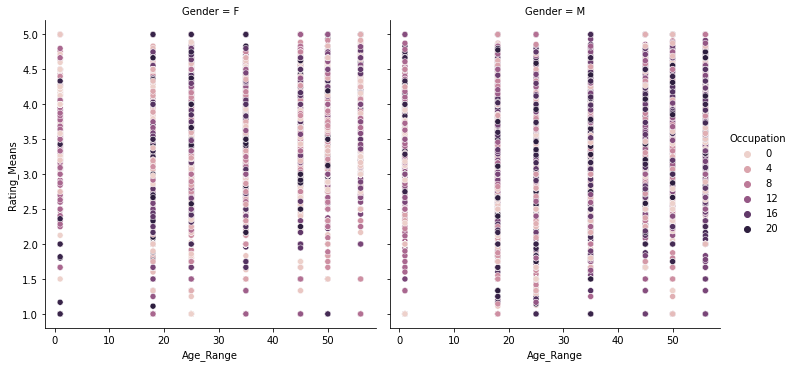

In [ ]:
sns.relplot(
    data=df_updated, x="Age_Range", y="Rating_Means",
    col="Gender",
    kind="scatter",
    hue='Occupation'
)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:green">The above scatter plot shows that both Male and Female with different Occupations and across the similar age range have similar rating pattern

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;While there are an almost overwhelming number of methods to use in Exploratory Data Analysis, one of the most effective starting tools is the pair plot (also called a scatterplot matrix). A pair plot allows us to see both distribution of single variables and relationships between two variables. Pair plots are a great method to identify trends for follow-up analysis; at the end of the day the nature of this project/model is to identify trends and recommend accordingly!

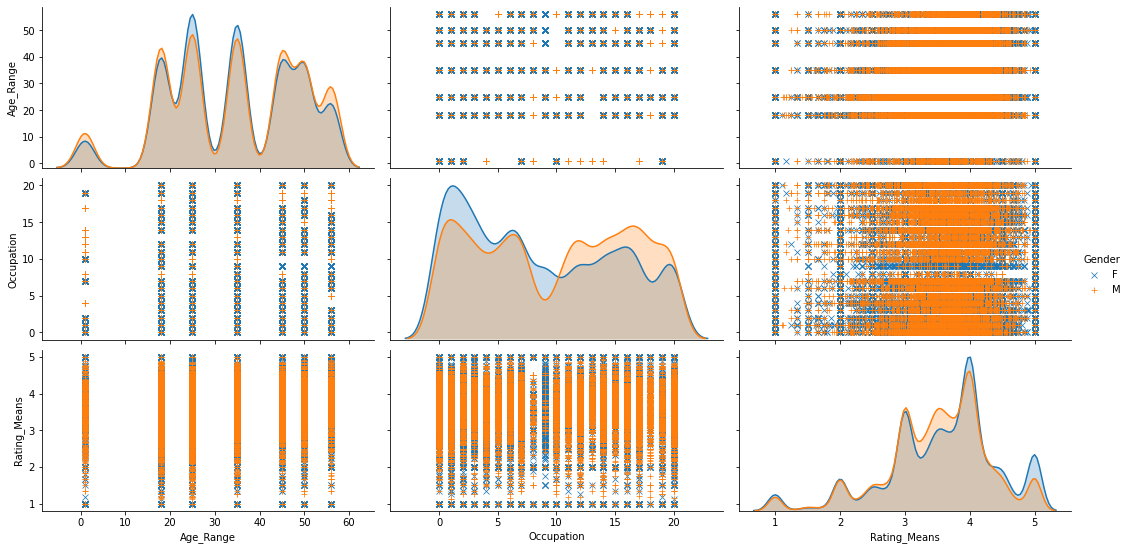

In [ ]:
#sns.set_theme(style="ticks")
sns.pairplot(df_updated, hue="Gender", aspect=2, markers=["x", "+"])

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:green">Looking at the pairplot, it gives us a very good general overview on the different combination of features and how the data is distributed based on that. Let us have a quick look on what is going on in terms of ratings:
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    - <span style="color:green">Age_Range vs Rating_Means: age range shows a similar rating pattern between Male and Female.
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    - <span style="color:green">Occupation vs Rating_Means: taking a holistic look at the scatter plot here we can see that across all the occupation range we have a higher concentration of both Male and Female from the middle to the top of the rating mean.
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    - <span style="color:green">Area plot for the Rating_Means: area plot shows in more clarity that the rating means of Male and Female are similar.
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    - <span style="color:red">Please note that both markers for the Male and Female are overlapping in a lot of areas this is why the color in the area plot is getting greyish and the intensity of the orange is a bit higher than the blue color

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Part 2 - Feature selection, Normalization and Clustering**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Feature selection:

In [ ]:
X = df_updated
X

,Genres,Gender,Age_Range,Occupation,Rating_Means
0,Comedy,F,1,1,1.000000
1,Comedy,F,18,0,1.666667
2,Comedy,F,18,1,2.333333
3,Comedy,F,18,4,2.333333
4,Comedy,F,18,6,1.000000
...,...,...,...,...,...
45355,Western,M,56,16,4.058642
45356,Western,M,56,17,3.916667
45357,Western,M,56,18,3.733456
45358,Western,M,56,19,4.000000


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;One important factor in k-means clustering is the use of quantative data instead of categorical data, so let us convert the data to quantative for Genres and Gender:

In [ ]:
#Replacing the Genres values with dummy numerical values and joining the 2 dataframes together:
X_df = pd.concat([X,pd.get_dummies(X['Genres'])], axis=1)
X_df

,Genres,Gender,Age_Range,Occupation,Rating_Means,Comedy,Action,Action|Adventure,Action|Adventure|Animation,Action|Adventure|Animation|Children's|Fantasy,Action|Adventure|Animation|Horror|Sci-Fi,Action|Adventure|Children's,Action|Adventure|Children's|Comedy,Action|Adventure|Children's|Fantasy,Action|Adventure|Children's|Sci-Fi,Action|Adventure|Comedy,Action|Adventure|Comedy|Crime,Action|Adventure|Comedy|Horror,Action|Adventure|Comedy|Horror|Sci-Fi,Action|Adventure|Comedy|Romance,Action|Adventure|Comedy|Sci-Fi,Action|Adventure|Comedy|War,Action|Adventure|Crime,Action|Adventure|Crime|Drama,Action|Adventure|Crime|Thriller,Action|Adventure|Drama,Action|Adventure|Drama|Romance,Action|Adventure|Drama|Sci-Fi|War,Action|Adventure|Drama|Thriller,Action|Adventure|Fantasy,Action|Adventure|Fantasy|Sci-Fi,Action|Adventure|Horror,Action|Adventure|Horror|Thriller,Action|Adventure|Mystery,Action|Adventure|Mystery|Sci-Fi,Action|Adventure|Romance,Action|Adventure|Romance|Sci-Fi|War,Action|Adventure|Romance|Thriller,Action|Adventure|Romance|War,Action|Adventure|Sci-Fi,...,Drama|Thriller|War,Drama|War,Drama|Western,Fantasy,Fantasy|Sci-Fi,Film-Noir,Film-Noir|Horror,Film-Noir|Mystery,Film-Noir|Mystery|Thriller,Film-Noir|Romance|Thriller,Film-Noir|Sci-Fi,Film-Noir|Sci-Fi|Thriller,Film-Noir|Thriller,Horror,Horror|Mystery,Horror|Mystery|Thriller,Horror|Romance,Horror|Sci-Fi,Horror|Sci-Fi|Thriller,Horror|Thriller,Musical,Musical|Romance,Musical|Romance|War,Musical|War,Mystery,Mystery|Romance|Thriller,Mystery|Sci-Fi,Mystery|Sci-Fi|Thriller,Mystery|Thriller,Romance,Romance|Thriller,Romance|War,Romance|Western,Sci-Fi,Sci-Fi|Thriller,Sci-Fi|Thriller|War,Sci-Fi|War,Thriller,War,Western
0,Comedy,F,1,1,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Comedy,F,18,0,1.666667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Comedy,F,18,1,2.333333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Comedy,F,18,4,2.333333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Comedy,F,18,6,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45355,Western,M,56,16,4.058642,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
45356,Western,M,56,17,3.916667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
45357,Western,M,56,18,3.733456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
45358,Western,M,56,19,4.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:green">This is how the Genres rated by the Genders is working: if a certain gender rated a genre it will show 1.0 if not it will show 0.0, and that is seen under each and every genre in the above dataframe.

In [ ]:
#Converting Male to 0 and Female to 1 and dropping the Genres column:
X_df['Gender'].replace(to_replace=['M','F'], value=[0,1],inplace=True)
X_df.drop(['Genres'], axis=1, inplace=True)
X_df

,Gender,Age_Range,Occupation,Rating_Means,Comedy,Action,Action|Adventure,Action|Adventure|Animation,Action|Adventure|Animation|Children's|Fantasy,Action|Adventure|Animation|Horror|Sci-Fi,Action|Adventure|Children's,Action|Adventure|Children's|Comedy,Action|Adventure|Children's|Fantasy,Action|Adventure|Children's|Sci-Fi,Action|Adventure|Comedy,Action|Adventure|Comedy|Crime,Action|Adventure|Comedy|Horror,Action|Adventure|Comedy|Horror|Sci-Fi,Action|Adventure|Comedy|Romance,Action|Adventure|Comedy|Sci-Fi,Action|Adventure|Comedy|War,Action|Adventure|Crime,Action|Adventure|Crime|Drama,Action|Adventure|Crime|Thriller,Action|Adventure|Drama,Action|Adventure|Drama|Romance,Action|Adventure|Drama|Sci-Fi|War,Action|Adventure|Drama|Thriller,Action|Adventure|Fantasy,Action|Adventure|Fantasy|Sci-Fi,Action|Adventure|Horror,Action|Adventure|Horror|Thriller,Action|Adventure|Mystery,Action|Adventure|Mystery|Sci-Fi,Action|Adventure|Romance,Action|Adventure|Romance|Sci-Fi|War,Action|Adventure|Romance|Thriller,Action|Adventure|Romance|War,Action|Adventure|Sci-Fi,Action|Adventure|Sci-Fi|Thriller,...,Drama|Thriller|War,Drama|War,Drama|Western,Fantasy,Fantasy|Sci-Fi,Film-Noir,Film-Noir|Horror,Film-Noir|Mystery,Film-Noir|Mystery|Thriller,Film-Noir|Romance|Thriller,Film-Noir|Sci-Fi,Film-Noir|Sci-Fi|Thriller,Film-Noir|Thriller,Horror,Horror|Mystery,Horror|Mystery|Thriller,Horror|Romance,Horror|Sci-Fi,Horror|Sci-Fi|Thriller,Horror|Thriller,Musical,Musical|Romance,Musical|Romance|War,Musical|War,Mystery,Mystery|Romance|Thriller,Mystery|Sci-Fi,Mystery|Sci-Fi|Thriller,Mystery|Thriller,Romance,Romance|Thriller,Romance|War,Romance|Western,Sci-Fi,Sci-Fi|Thriller,Sci-Fi|Thriller|War,Sci-Fi|War,Thriller,War,Western
0,1,1,1,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,18,0,1.666667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,18,1,2.333333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,18,4,2.333333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,18,6,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45355,0,56,16,4.058642,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
45356,0,56,17,3.916667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
45357,0,56,18,3.733456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
45358,0,56,19,4.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:green">Perfect! we have now the Features ready to be normalized.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Normalization:

In [ ]:
#Normalizing
from sklearn import preprocessing #importing preprocessing from sklearn which will be used to normalize the data

X = preprocessing.StandardScaler().fit(X_df).transform(X_df)
X[0:10]

array([[ 1.20137725, -2.29950964, -1.28919847, ..., -0.070447  ,
        -0.05760078, -0.06553828],
       [ 1.20137725, -1.13166975, -1.44292665, ..., -0.070447  ,
        -0.05760078, -0.06553828],
       [ 1.20137725, -1.13166975, -1.28919847, ..., -0.070447  ,
        -0.05760078, -0.06553828],
       ...,
       [ 1.20137725, -1.13166975,  0.70926776, ..., -0.070447  ,
        -0.05760078, -0.06553828],
       [ 1.20137725, -1.13166975,  1.17045227, ..., -0.070447  ,
        -0.05760078, -0.06553828],
       [ 1.20137725, -1.13166975,  1.63163679, ..., -0.070447  ,
        -0.05760078, -0.06553828]])

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Checking for the best/most accurate k:

In [ ]:
#Importing and installing the necessary packages
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go

In [ ]:
#Plotting the K-Mean graph
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
mean_distance_of_data_points_to_cluster_centroid = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = "k-means++", n_init=10, tol=1e-04, random_state=4).fit(X)
    mean_distance_of_data_points_to_cluster_centroid.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11), y=mean_distance_of_data_points_to_cluster_centroid))
fig.update_layout(title="Graphical Interpretation for Choosing the Best K", 
                  xaxis=dict(range=[0,11], title="Number of Clusters"),
                  yaxis={'title':'Mean distance of data points to cluster centroid'}, 
                  annotations=[
        dict(
            x=3,
            y=mean_distance_of_data_points_to_cluster_centroid[2],
            xref="x",
            yref="y",
            text="Elbow",
            showarrow=True,
            arrowhead=7,
            ax=20,
            ay=-40
        )
    ])

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:green">The graph shows that the 'Elbow' is at value 3, so I am going to use k=3 in clustering.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Clustering:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The reason I am using **k-means++** as the algorithm is to seed the initial centers for k-means and avoiding the sometimes poor clustering found by the standard k-means algorithm.
Market experiments show the augmentation of k-means, which is k-means++, improves both the speed and the accuracy of k-means, often quite dramatically.

In [ ]:
#Running k-means clustering with k=3
k=3
kmeans1 = KMeans(n_clusters=k, init = "k-means++", n_init=10, tol=1e-04, random_state=4).fit(X)

#Checking cluster labels generated for each row in the dataframe
kmeans1.labels_[0:50]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2], dtype=int32)

In [ ]:
X_df['Cluster_Labels'] = kmeans1.labels_
X_df

,Gender,Age_Range,Occupation,Rating_Means,Comedy,Action,Action|Adventure,Action|Adventure|Animation,Action|Adventure|Animation|Children's|Fantasy,Action|Adventure|Animation|Horror|Sci-Fi,Action|Adventure|Children's,Action|Adventure|Children's|Comedy,Action|Adventure|Children's|Fantasy,Action|Adventure|Children's|Sci-Fi,Action|Adventure|Comedy,Action|Adventure|Comedy|Crime,Action|Adventure|Comedy|Horror,Action|Adventure|Comedy|Horror|Sci-Fi,Action|Adventure|Comedy|Romance,Action|Adventure|Comedy|Sci-Fi,Action|Adventure|Comedy|War,Action|Adventure|Crime,Action|Adventure|Crime|Drama,Action|Adventure|Crime|Thriller,Action|Adventure|Drama,Action|Adventure|Drama|Romance,Action|Adventure|Drama|Sci-Fi|War,Action|Adventure|Drama|Thriller,Action|Adventure|Fantasy,Action|Adventure|Fantasy|Sci-Fi,Action|Adventure|Horror,Action|Adventure|Horror|Thriller,Action|Adventure|Mystery,Action|Adventure|Mystery|Sci-Fi,Action|Adventure|Romance,Action|Adventure|Romance|Sci-Fi|War,Action|Adventure|Romance|Thriller,Action|Adventure|Romance|War,Action|Adventure|Sci-Fi,Action|Adventure|Sci-Fi|Thriller,...,Drama|War,Drama|Western,Fantasy,Fantasy|Sci-Fi,Film-Noir,Film-Noir|Horror,Film-Noir|Mystery,Film-Noir|Mystery|Thriller,Film-Noir|Romance|Thriller,Film-Noir|Sci-Fi,Film-Noir|Sci-Fi|Thriller,Film-Noir|Thriller,Horror,Horror|Mystery,Horror|Mystery|Thriller,Horror|Romance,Horror|Sci-Fi,Horror|Sci-Fi|Thriller,Horror|Thriller,Musical,Musical|Romance,Musical|Romance|War,Musical|War,Mystery,Mystery|Romance|Thriller,Mystery|Sci-Fi,Mystery|Sci-Fi|Thriller,Mystery|Thriller,Romance,Romance|Thriller,Romance|War,Romance|Western,Sci-Fi,Sci-Fi|Thriller,Sci-Fi|Thriller|War,Sci-Fi|War,Thriller,War,Western,Cluster_Labels
0,1,1,1,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,18,0,1.666667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,18,1,2.333333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,18,4,2.333333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,18,6,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45355,0,56,16,4.058642,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
45356,0,56,17,3.916667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
45357,0,56,18,3.733456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
45358,0,56,19,4.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
#Moving Cluster_Labels column to the front of the dataframe for better visibility:
X_df = X_df[ ['Cluster_Labels'] + [ col for col in X_df.columns if col != 'Cluster_Labels' ] ]
X_df

,Cluster_Labels,Gender,Age_Range,Occupation,Rating_Means,Comedy,Action,Action|Adventure,Action|Adventure|Animation,Action|Adventure|Animation|Children's|Fantasy,Action|Adventure|Animation|Horror|Sci-Fi,Action|Adventure|Children's,Action|Adventure|Children's|Comedy,Action|Adventure|Children's|Fantasy,Action|Adventure|Children's|Sci-Fi,Action|Adventure|Comedy,Action|Adventure|Comedy|Crime,Action|Adventure|Comedy|Horror,Action|Adventure|Comedy|Horror|Sci-Fi,Action|Adventure|Comedy|Romance,Action|Adventure|Comedy|Sci-Fi,Action|Adventure|Comedy|War,Action|Adventure|Crime,Action|Adventure|Crime|Drama,Action|Adventure|Crime|Thriller,Action|Adventure|Drama,Action|Adventure|Drama|Romance,Action|Adventure|Drama|Sci-Fi|War,Action|Adventure|Drama|Thriller,Action|Adventure|Fantasy,Action|Adventure|Fantasy|Sci-Fi,Action|Adventure|Horror,Action|Adventure|Horror|Thriller,Action|Adventure|Mystery,Action|Adventure|Mystery|Sci-Fi,Action|Adventure|Romance,Action|Adventure|Romance|Sci-Fi|War,Action|Adventure|Romance|Thriller,Action|Adventure|Romance|War,Action|Adventure|Sci-Fi,...,Drama|Thriller|War,Drama|War,Drama|Western,Fantasy,Fantasy|Sci-Fi,Film-Noir,Film-Noir|Horror,Film-Noir|Mystery,Film-Noir|Mystery|Thriller,Film-Noir|Romance|Thriller,Film-Noir|Sci-Fi,Film-Noir|Sci-Fi|Thriller,Film-Noir|Thriller,Horror,Horror|Mystery,Horror|Mystery|Thriller,Horror|Romance,Horror|Sci-Fi,Horror|Sci-Fi|Thriller,Horror|Thriller,Musical,Musical|Romance,Musical|Romance|War,Musical|War,Mystery,Mystery|Romance|Thriller,Mystery|Sci-Fi,Mystery|Sci-Fi|Thriller,Mystery|Thriller,Romance,Romance|Thriller,Romance|War,Romance|Western,Sci-Fi,Sci-Fi|Thriller,Sci-Fi|Thriller|War,Sci-Fi|War,Thriller,War,Western
0,1,1,1,1,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,18,0,1.666667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,18,1,2.333333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,18,4,2.333333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,18,6,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45355,0,0,56,16,4.058642,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
45356,0,0,56,17,3.916667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
45357,0,0,56,18,3.733456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
45358,0,0,56,19,4.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Part 3 - Insights**

In [ ]:
#Grouping by Cluster_Labels and checking the mean of each feature:
X_df_grouped = X_df.groupby(['Cluster_Labels']).mean()
X_df_grouped

,Gender,Age_Range,Occupation,Rating_Means,Comedy,Action,Action|Adventure,Action|Adventure|Animation,Action|Adventure|Animation|Children's|Fantasy,Action|Adventure|Animation|Horror|Sci-Fi,Action|Adventure|Children's,Action|Adventure|Children's|Comedy,Action|Adventure|Children's|Fantasy,Action|Adventure|Children's|Sci-Fi,Action|Adventure|Comedy,Action|Adventure|Comedy|Crime,Action|Adventure|Comedy|Horror,Action|Adventure|Comedy|Horror|Sci-Fi,Action|Adventure|Comedy|Romance,Action|Adventure|Comedy|Sci-Fi,Action|Adventure|Comedy|War,Action|Adventure|Crime,Action|Adventure|Crime|Drama,Action|Adventure|Crime|Thriller,Action|Adventure|Drama,Action|Adventure|Drama|Romance,Action|Adventure|Drama|Sci-Fi|War,Action|Adventure|Drama|Thriller,Action|Adventure|Fantasy,Action|Adventure|Fantasy|Sci-Fi,Action|Adventure|Horror,Action|Adventure|Horror|Thriller,Action|Adventure|Mystery,Action|Adventure|Mystery|Sci-Fi,Action|Adventure|Romance,Action|Adventure|Romance|Sci-Fi|War,Action|Adventure|Romance|Thriller,Action|Adventure|Romance|War,Action|Adventure|Sci-Fi,Action|Adventure|Sci-Fi|Thriller,...,Drama|Thriller|War,Drama|War,Drama|Western,Fantasy,Fantasy|Sci-Fi,Film-Noir,Film-Noir|Horror,Film-Noir|Mystery,Film-Noir|Mystery|Thriller,Film-Noir|Romance|Thriller,Film-Noir|Sci-Fi,Film-Noir|Sci-Fi|Thriller,Film-Noir|Thriller,Horror,Horror|Mystery,Horror|Mystery|Thriller,Horror|Romance,Horror|Sci-Fi,Horror|Sci-Fi|Thriller,Horror|Thriller,Musical,Musical|Romance,Musical|Romance|War,Musical|War,Mystery,Mystery|Romance|Thriller,Mystery|Sci-Fi,Mystery|Sci-Fi|Thriller,Mystery|Thriller,Romance,Romance|Thriller,Romance|War,Romance|Western,Sci-Fi,Sci-Fi|Thriller,Sci-Fi|Thriller|War,Sci-Fi|War,Thriller,War,Western
Cluster_Labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,35.984462,15.523596,3.509702,0.001518,0.004408,0.004553,0.002674,0.001662,0.002963,0.000867,0.002963,0.000578,0.002674,0.003541,0.004192,0.002457,0.003180,0.004481,0.004336,0.002385,0.003830,0.003903,0.002240,0.003903,0.002746,0.004408,0.002602,0.003975,0.004553,0.004192,0.003541,0.003903,0.003035,0.003614,0.004336,0.003830,0.003975,0.004336,0.004408,...,0.003614,0.004698,0.004047,0.000000,0.003686,0.003541,0.000000,0.004192,0.004264,0.003035,0.004336,0.003686,0.004336,0.004553,0.001590,0.003541,0.003975,0.004336,0.003469,0.004553,0.004119,0.004192,0.002674,0.003180,0.004047,0.003397,0.003108,0.003903,0.004481,0.003614,0.003035,0.001662,0.001301,0.004408,0.004192,0.003180,0.004192,0.004698,0.003686,0.004336
1,1.0,34.265392,8.624293,3.577649,0.001185,0.005333,0.005117,0.001724,0.001400,0.002262,0.000162,0.002532,0.000323,0.001562,0.003878,0.003932,0.001993,0.002478,0.005117,0.004740,0.001454,0.003501,0.004094,0.000808,0.003986,0.002801,0.004740,0.000970,0.003717,0.005279,0.003986,0.003124,0.003771,0.002747,0.004094,0.005063,0.003878,0.004417,0.005171,0.005117,...,0.003393,0.005548,0.003501,0.000000,0.002855,0.003393,0.000054,0.004471,0.004794,0.003340,0.004309,0.002801,0.004255,0.005279,0.000593,0.003501,0.003878,0.004902,0.003555,0.005117,0.004902,0.005063,0.003016,0.003286,0.004148,0.004148,0.001885,0.003232,0.005225,0.004740,0.003771,0.001562,0.000485,0.005009,0.004363,0.001562,0.004417,0.005602,0.002909,0.004471
2,0.0,33.158126,3.924140,3.494314,0.001775,0.004476,0.004476,0.002392,0.001698,0.002933,0.001235,0.002855,0.001158,0.002933,0.003936,0.004013,0.002778,0.003087,0.004476,0.004013,0.002084,0.003627,0.003781,0.002006,0.004013,0.002161,0.004476,0.002701,0.003781,0.004476,0.004090,0.003550,0.004090,0.003087,0.003473,0.004167,0.003704,0.003936,0.004630,0.004630,...,0.003627,0.004476,0.003473,0.000077,0.003627,0.003627,0.000077,0.003936,0.004013,0.003241,0.003936,0.003627,0.003704,0.004476,0.001698,0.003627,0.003781,0.004399,0.003473,0.004399,0.003859,0.003859,0.002701,0.002855,0.003396,0.003396,0.003010,0.003704,0.004244,0.003627,0.003087,0.001698,0.001158,0.004244,0.004167,0.002624,0.003781,0.004244,0.003473,0.003936


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Getting the top 10 genres for each cluster which the recommendation model will be based on

In [ ]:
X_df_grouped_res = X_df_grouped.reset_index()
X_df_grouped_drop = X_df_grouped_res.drop(['Gender', 'Age_Range', 'Occupation', 'Rating_Means'], axis=1)
X_df_grouped_drop

,Cluster_Labels,Comedy,Action,Action|Adventure,Action|Adventure|Animation,Action|Adventure|Animation|Children's|Fantasy,Action|Adventure|Animation|Horror|Sci-Fi,Action|Adventure|Children's,Action|Adventure|Children's|Comedy,Action|Adventure|Children's|Fantasy,Action|Adventure|Children's|Sci-Fi,Action|Adventure|Comedy,Action|Adventure|Comedy|Crime,Action|Adventure|Comedy|Horror,Action|Adventure|Comedy|Horror|Sci-Fi,Action|Adventure|Comedy|Romance,Action|Adventure|Comedy|Sci-Fi,Action|Adventure|Comedy|War,Action|Adventure|Crime,Action|Adventure|Crime|Drama,Action|Adventure|Crime|Thriller,Action|Adventure|Drama,Action|Adventure|Drama|Romance,Action|Adventure|Drama|Sci-Fi|War,Action|Adventure|Drama|Thriller,Action|Adventure|Fantasy,Action|Adventure|Fantasy|Sci-Fi,Action|Adventure|Horror,Action|Adventure|Horror|Thriller,Action|Adventure|Mystery,Action|Adventure|Mystery|Sci-Fi,Action|Adventure|Romance,Action|Adventure|Romance|Sci-Fi|War,Action|Adventure|Romance|Thriller,Action|Adventure|Romance|War,Action|Adventure|Sci-Fi,Action|Adventure|Sci-Fi|Thriller,Action|Adventure|Sci-Fi|Thriller|War,Action|Adventure|Sci-Fi|War,Action|Adventure|Thriller,...,Drama|Thriller|War,Drama|War,Drama|Western,Fantasy,Fantasy|Sci-Fi,Film-Noir,Film-Noir|Horror,Film-Noir|Mystery,Film-Noir|Mystery|Thriller,Film-Noir|Romance|Thriller,Film-Noir|Sci-Fi,Film-Noir|Sci-Fi|Thriller,Film-Noir|Thriller,Horror,Horror|Mystery,Horror|Mystery|Thriller,Horror|Romance,Horror|Sci-Fi,Horror|Sci-Fi|Thriller,Horror|Thriller,Musical,Musical|Romance,Musical|Romance|War,Musical|War,Mystery,Mystery|Romance|Thriller,Mystery|Sci-Fi,Mystery|Sci-Fi|Thriller,Mystery|Thriller,Romance,Romance|Thriller,Romance|War,Romance|Western,Sci-Fi,Sci-Fi|Thriller,Sci-Fi|Thriller|War,Sci-Fi|War,Thriller,War,Western
0,0,0.001518,0.004408,0.004553,0.002674,0.001662,0.002963,0.000867,0.002963,0.000578,0.002674,0.003541,0.004192,0.002457,0.003180,0.004481,0.004336,0.002385,0.003830,0.003903,0.002240,0.003903,0.002746,0.004408,0.002602,0.003975,0.004553,0.004192,0.003541,0.003903,0.003035,0.003614,0.004336,0.003830,0.003975,0.004336,0.004408,0.002602,0.003686,0.004336,...,0.003614,0.004698,0.004047,0.000000,0.003686,0.003541,0.000000,0.004192,0.004264,0.003035,0.004336,0.003686,0.004336,0.004553,0.001590,0.003541,0.003975,0.004336,0.003469,0.004553,0.004119,0.004192,0.002674,0.003180,0.004047,0.003397,0.003108,0.003903,0.004481,0.003614,0.003035,0.001662,0.001301,0.004408,0.004192,0.003180,0.004192,0.004698,0.003686,0.004336
1,1,0.001185,0.005333,0.005117,0.001724,0.001400,0.002262,0.000162,0.002532,0.000323,0.001562,0.003878,0.003932,0.001993,0.002478,0.005117,0.004740,0.001454,0.003501,0.004094,0.000808,0.003986,0.002801,0.004740,0.000970,0.003717,0.005279,0.003986,0.003124,0.003771,0.002747,0.004094,0.005063,0.003878,0.004417,0.005171,0.005117,0.000916,0.002963,0.004956,...,0.003393,0.005548,0.003501,0.000000,0.002855,0.003393,0.000054,0.004471,0.004794,0.003340,0.004309,0.002801,0.004255,0.005279,0.000593,0.003501,0.003878,0.004902,0.003555,0.005117,0.004902,0.005063,0.003016,0.003286,0.004148,0.004148,0.001885,0.003232,0.005225,0.004740,0.003771,0.001562,0.000485,0.005009,0.004363,0.001562,0.004417,0.005602,0.002909,0.004471
2,2,0.001775,0.004476,0.004476,0.002392,0.001698,0.002933,0.001235,0.002855,0.001158,0.002933,0.003936,0.004013,0.002778,0.003087,0.004476,0.004013,0.002084,0.003627,0.003781,0.002006,0.004013,0.002161,0.004476,0.002701,0.003781,0.004476,0.004090,0.003550,0.004090,0.003087,0.003473,0.004167,0.003704,0.003936,0.004630,0.004630,0.002392,0.003473,0.004244,...,0.003627,0.004476,0.003473,0.000077,0.003627,0.003627,0.000077,0.003936,0.004013,0.003241,0.003936,0.003627,0.003704,0.004476,0.001698,0.003627,0.003781,0.004399,0.003473,0.004399,0.003859,0.003859,0.002701,0.002855,0.003396,0.003396,0.003010,0.003704,0.004244,0.003627,0.003087,0.001698,0.001158,0.004244,0.004167,0.002624,0.003781,0.004244,0.003473,0.003936


In [ ]:
num_top10_genres = 10

for cluster in X_df_grouped_drop['Cluster_Labels']:
    print('Cluster number:', cluster)
    temp = X_df_grouped_drop[X_df_grouped_drop['Cluster_Labels'] == cluster].T.reset_index()
    temp.columns = ['genre','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 6})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top10_genres))
    print('\n')

Cluster number: 0
            genre      freq
0  Drama|Thriller  0.004842
1          Comedy  0.004770
2    Comedy|Drama  0.004770
3           Drama  0.004770
4   Drama|Romance  0.004770
5        Thriller  0.004698
6       Drama|War  0.004698
7  Comedy|Romance  0.004625
8     Crime|Drama  0.004625
9   Action|Sci-Fi  0.004625


Cluster number: 1
               genre      freq
0              Drama  0.005925
1      Drama|Romance  0.005871
2             Comedy  0.005871
3       Comedy|Drama  0.005764
4     Comedy|Romance  0.005710
5           Thriller  0.005602
6     Drama|Thriller  0.005602
7   Action|Drama|War  0.005602
8  Drama|Romance|War  0.005548
9          Drama|War  0.005548


Cluster number: 2
                         genre      freq
0                       Comedy  0.004939
1                        Drama  0.004862
2                 Comedy|Drama  0.004862
3               Comedy|Romance  0.004785
4             Action|Drama|War  0.004708
5              Action|Thriller  0.004708
6     

In [ ]:
#Creating a function that sorts the genres in descending order:
def return_most_common_genres(row, num_top10_genres):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top10_genres]

In [ ]:
#Putting the top 10 genres in a dataframe

num_top10_genres = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Cluster_Labels']
for ind in np.arange(num_top10_genres):
    try:
        columns.append('{}{} Most Viewed Genre'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Viewed Genre'.format(ind+1))

# create a new dataframe
X_genres_sorted = pd.DataFrame(columns=columns)
X_genres_sorted['Cluster_Labels'] = X_df_grouped_drop['Cluster_Labels']

for ind in np.arange(X_df_grouped_drop.shape[0]):
    X_genres_sorted.iloc[ind, 1:] = return_most_common_genres(X_df_grouped_drop.iloc[ind, :], num_top10_genres)

X_genres_sorted

,Cluster_Labels,1st Most Viewed Genre,2nd Most Viewed Genre,3rd Most Viewed Genre,4th Most Viewed Genre,5th Most Viewed Genre,6th Most Viewed Genre,7th Most Viewed Genre,8th Most Viewed Genre,9th Most Viewed Genre,10th Most Viewed Genre
0,0,Drama|Thriller,Comedy,Drama|Romance,Drama,Comedy|Drama,Thriller,Drama|War,Action|Drama|War,Crime|Drama,Comedy|Romance
1,1,Drama,Comedy,Drama|Romance,Comedy|Drama,Comedy|Romance,Drama|Thriller,Thriller,Action|Drama|War,Drama|War,Drama|Romance|War
2,2,Comedy,Comedy|Drama,Drama,Comedy|Romance,Comedy|Sci-Fi,Action|Thriller,Action|Drama|War,Action|Adventure|Sci-Fi|Thriller,Action|Adventure|Sci-Fi,Animation|Children's|Comedy


In [ ]:
#Droping all the genre columns from X_df_grouped_res dataframe so it can be later merged with X_genres_sorted dataframe
X_df_modified = X_df_grouped_res.drop(X_df_grouped_res.columns[5:307], axis=1)
X_df_modified

,Cluster_Labels,Gender,Age_Range,Occupation,Rating_Means
0,0,0.0,35.984462,15.523596,3.509702
1,1,1.0,34.265392,8.624293,3.577649
2,2,0.0,33.158126,3.924140,3.494314


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:red">Based on each cluster, the top 10 movie genres that will be recommended are shown in the following dataframe:

In [ ]:
#Merging the X_genres_sorted and the X_df_modified:
X_df_top10_genres = X_df_modified[['Cluster_Labels', 'Gender', 'Age_Range', 'Occupation', 'Rating_Means']].merge(X_genres_sorted[['Cluster_Labels', 
                                                                            '1st Most Viewed Genre', '2nd Most Viewed Genre', '3rd Most Viewed Genre',
                                                                            '4th Most Viewed Genre', '5th Most Viewed Genre', '6th Most Viewed Genre', '7th Most Viewed Genre',
                                                                            '8th Most Viewed Genre', '9th Most Viewed Genre', '10th Most Viewed Genre']],
                                                                            on=['Cluster_Labels'], how='left')
X_df_top10_genres

,Cluster_Labels,Gender,Age_Range,Occupation,Rating_Means,1st Most Viewed Genre,2nd Most Viewed Genre,3rd Most Viewed Genre,4th Most Viewed Genre,5th Most Viewed Genre,6th Most Viewed Genre,7th Most Viewed Genre,8th Most Viewed Genre,9th Most Viewed Genre,10th Most Viewed Genre
0,0,0.0,35.984462,15.523596,3.509702,Drama|Thriller,Comedy,Drama|Romance,Drama,Comedy|Drama,Thriller,Drama|War,Action|Drama|War,Crime|Drama,Comedy|Romance
1,1,1.0,34.265392,8.624293,3.577649,Drama,Comedy,Drama|Romance,Comedy|Drama,Comedy|Romance,Drama|Thriller,Thriller,Action|Drama|War,Drama|War,Drama|Romance|War
2,2,0.0,33.158126,3.924140,3.494314,Comedy,Comedy|Drama,Drama,Comedy|Romance,Comedy|Sci-Fi,Action|Thriller,Action|Drama|War,Action|Adventure|Sci-Fi|Thriller,Action|Adventure|Sci-Fi,Animation|Children's|Comedy


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3D scatter plot:

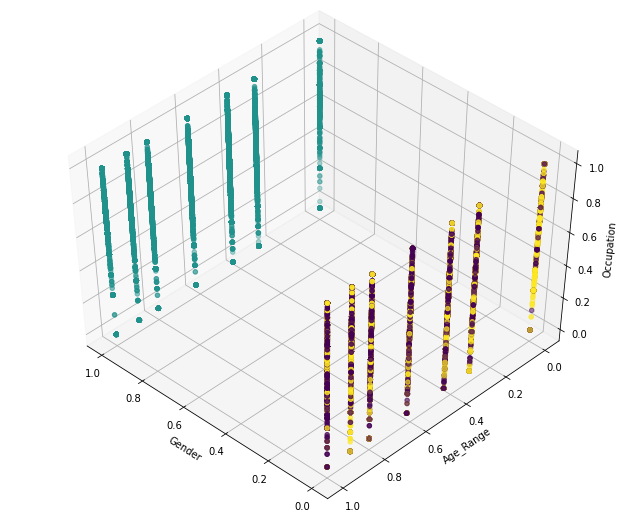

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(9, 7))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
ax.set_xlabel('Gender')
ax.set_ylabel('Age_Range')
ax.set_zlabel('Occupation')
labels = kmeans1.labels_

ax.scatter(X[:, 0], X[:, 1], X[:, 3], c= labels.astype(np.float))

<br>

## **Results of Clustering**

The data frame **X_df_top10_genres** justifies the cluster formation that we see in the 3D scatter plot. Cluster **0** and **1** are tightly concentrated on top of each other since the majority of the feature data points are extremely similar, such as **Gender**, **Age_Range** and **Rating_Means**.

On the other hand, cluster **1** shows a difference in the feature values, therefore these data points formed a seperate cluster.

From the clustering result, we can see that the cluster's colors are distributed as follows:
- Cluster 0: **Dark Blue**
- Cluster 1: **Yellow**
- Cluster 2: **Dark Green**

<br>

## **Observations and Analysis**

- The data show that Males, regardless of age and occupation, are clustered together where the same recommendation fits both labels.

- As for Females, they have apparantly a different recommendation although the data points are close to the ones of cluster 0 and 1.

- The feature that is differentiating between the clusters is the **Occupation**; as observed in the data frame, the deviation between the means is significatnly higher than the deviation in the other features.

- What we can also observe is the close similarity of the Rating_Means of all clusters.

- The **X_df_top10_genres** data frame shows the top 10 movie genres for all clusters are very similar, the difference is only between the ranking from 1 to 10

<br>

## **Conclusions**

With the observation and analysis done, we can see that the Rating_Means feature is not playing a big role in determining the cluster as it is almost the same for all clusters, so it is evident that this viewer recommendation model will work as follows as shown in the **X_df_top10_genres** data frame:
- For male with age range between 25 and 34, and with an occupation of college/grad student (rounded up) the recommendation model will classify that in the <span style="color:blue">**dark blue** </span> cluster and recommend the top 10 movies.

- For male with age range range between 35 to 44, and with an occupation of self employed (rounded up) the recommendation model will classify that in the <span style="color:dark green">**yellow** </span> cluster and recommend the top 10 movies.

- For female with age range between 25 and 34, and with an occupation of homemaker (rounded up) the recommendation model will classify that in the <span style="color:yellow">**dark green** </span> cluster and recommend the top 10 movies.

This model is trained based on the data set at hand; there are certainly way more age ranges and occupations that are not covered by the recommendation algorithm, therefore there is always room for improvements that this model could use.